## Telecom churn Assignment

### Business problem
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first      three months. To do this task well, understanding the typical customer behaviour during churn will be helpful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
import warnings
warnings.filterwarnings('ignore')
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



In [2]:
churn_df = pd.read_csv("telecom_churn_data.csv")
churn_df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
churn_df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.0

In [5]:
churn_df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

 High Value customers

In [6]:
churn_df['total_data_rech_6'] = churn_df['total_rech_data_6'] * churn_df['av_rech_amt_data_6']
churn_df['total_data_rech_7'] = churn_df['total_rech_data_7'] * churn_df['av_rech_amt_data_7']

churn_df['amt_data_6'] = churn_df[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
churn_df['amt_data_7'] = churn_df[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

churn_df['AVG_amt_data_6_7'] = churn_df[['amt_data_6','amt_data_7']].mean(axis=1)

In [7]:
churn_df[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0))
df = churn_df[(churn_df['AVG_amt_data_6_7']> churn_df['AVG_amt_data_6_7'].quantile(0.7))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


### Target column churn  tag 

In [8]:
df['churn_tag'] = np.where(
                            ((df['total_ic_mou_9'] == 0.00) | (df['total_og_mou_9'] == 0.00))
                            & ((df['vol_2g_mb_9'] == 0.00) | (df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [9]:
df['churn_tag'].value_counts()


0    26698
1     3255
Name: churn_tag, dtype: int64

In [10]:
print(df['churn_tag'].value_counts())
print(df['churn_tag'].value_counts()/df.shape[0])

0    26698
1     3255
Name: churn_tag, dtype: int64
0    0.89133
1    0.10867
Name: churn_tag, dtype: float64


### Checking misssing values and deleting columns having greater than 70 % null values

In [11]:

df.isnull().sum()*100/df.shape[0]
df.shape

(29953, 177)

### Dropping columns having >70 % null values

In [12]:
df.dropna(thresh=df.shape[0]*0.7,how='all',axis=1,inplace=True)
df.shape

(29953, 145)

### Dropping less imp variables

In [13]:
not_imp = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(not_imp[not_imp['nunique'] == 1])
df = df.drop(columns = list(not_imp[not_imp['nunique'] == 1]['feature']))

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1


### Segregating columns by type

In [14]:
category_col=[col for col in df.columns if df[col].dtypes=='object']
Num_col=[col for col in df.columns if df[col].dtypes!='object']

### Imputing the number colum with median and object column with 'missing'

In [15]:

def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna(series.median())
    elif series.dtype is pd.np.dtype(object):
        return series.fillna('missing')
    else:
        return series
df = df.apply(myfillna)

In [16]:
df['churn_tag'].value_counts()

0    26698
1     3255
Name: churn_tag, dtype: int64

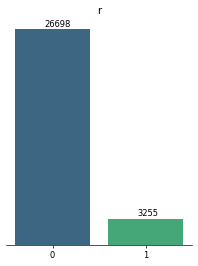

In [17]:
value_ct = df.churn_tag.value_counts().iloc[:31]

fig, ax = plt.subplots(figsize = (4,5), dpi = 60)
sns.countplot(x = "churn_tag", data = df, order=value_ct.index, palette = "viridis");

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.31, p.get_height()+400))

plt.title("r");
plt.xlabel("");


### Shape of data

In [18]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nUnique values :  \n",df.nunique())



Rows     :  29953
Columns  :  132

Unique values :  
 mobile_number       29953
arpu_6              29029
arpu_7              29040
arpu_8              28035
onnet_mou_6         16872
                    ...  
jun_vbc_3g           9283
amt_data_6           3801
amt_data_7           4015
AVG_amt_data_6_7     5182
churn_tag               2
Length: 132, dtype: int64


In [19]:
Num_col

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

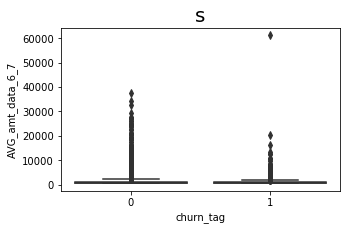

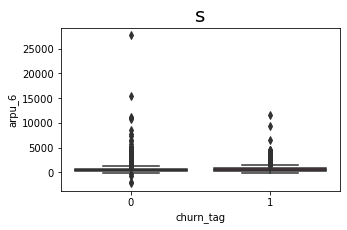

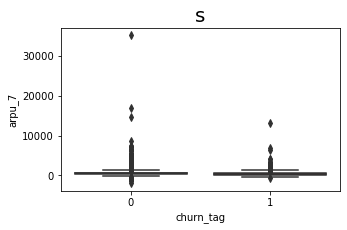

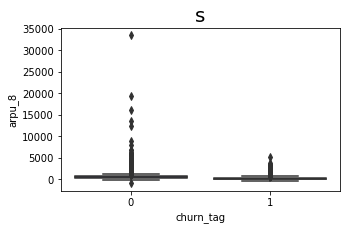

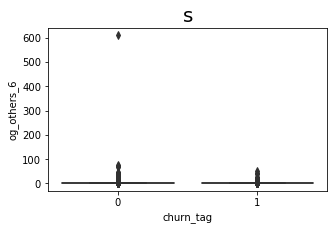

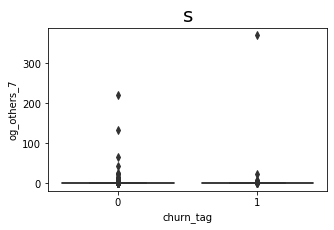

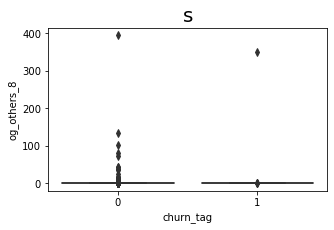

In [20]:
for col in ['AVG_amt_data_6_7','arpu_6',
 'arpu_7', 'arpu_8','og_others_6','og_others_7','og_others_8',]:
    
    plt.rcParams['figure.figsize'] = (5, 3)
    sns.boxplot(df['churn_tag'],df[col], palette = 'icefire')
    plt.title('s', fontsize = 20)
    plt.show()


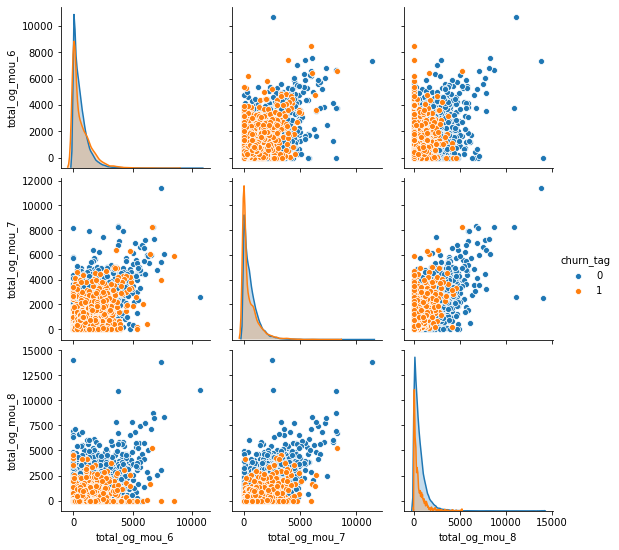

In [21]:
sns.pairplot(data=df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_tag']],hue='churn_tag')

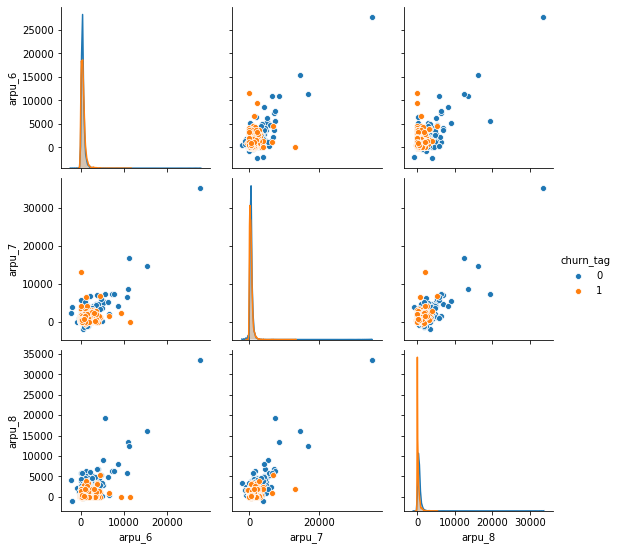

In [22]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn_tag']],hue='churn_tag')

### Deriving some features from existing features

In [23]:
df['loc_og_t2t_mou_7_minus_6'] = df['loc_og_t2t_mou_7'] - df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_7_minus_6'] = df['loc_og_t2m_mou_7'] - df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_7_minus_6'] = df['loc_og_t2f_mou_7'] - df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_7_minus_6'] = df['loc_og_t2c_mou_7'] - df['loc_og_t2c_mou_6']
df['loc_og_mou_7_minus_6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_t2t_mou_7_minus_6'] = df['std_og_t2t_mou_7'] - df['std_og_t2t_mou_6']
df['std_og_t2m_mou_7_minus_6'] = df['std_og_t2m_mou_7'] - df['std_og_t2m_mou_6']
df['std_og_t2f_mou_7_minus_6'] = df['std_og_t2f_mou_7'] - df['std_og_t2f_mou_6']
df['std_og_mou_7_minus_6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['loc_og_mou_7_minus_6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_mou_7_minus_6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['isd_og_mou_7_minus_6'] = df['isd_og_mou_7'] - df['isd_og_mou_6']
df['spl_og_mou_7_minus_6'] = df['spl_og_mou_7'] - df['spl_og_mou_6']
df['og_others_7_minus_6'] = df['og_others_7'] - df['og_others_6']
df['total_og_mou_7_minus_6'] = df['total_og_mou_7'] - df['total_og_mou_6']

In [24]:
df['loc_ic_t2t_mou_8_minus_7'] = df['loc_ic_t2t_mou_8'] - df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_8_minus_7'] = df['loc_ic_t2m_mou_8'] - df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_8_minus_7'] = df['loc_ic_t2f_mou_8'] - df['loc_ic_t2f_mou_7']
df['loc_ic_mou_8_minus_7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_t2t_mou_8_minus_7'] = df['std_ic_t2t_mou_8'] - df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_8_minus_7'] = df['std_ic_t2m_mou_8'] - df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_8_minus_7'] = df['std_ic_t2f_mou_8'] - df['std_ic_t2f_mou_7']
df['std_ic_mou_8_minus_7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['loc_ic_mou_8_minus_7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_mou_8_minus_7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['spl_ic_mou_8_minus_7'] = df['spl_ic_mou_8'] - df['spl_ic_mou_7']
df['isd_ic_mou_8_minus_7'] = df['isd_ic_mou_8'] - df['isd_ic_mou_7']
df['ic_others_8_minus_7'] = df['ic_others_8'] - df['ic_others_7']
df['total_ic_mou_8_minus_7'] = df['total_ic_mou_8'] - df['total_ic_mou_7']


In [25]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [26]:
df[Num_col] = df[Num_col].apply(cap_outliers, axis=0)

In [27]:
# divide data into train and test
y=df.loc[:,'churn_tag'] 
X = df.drop("churn_tag", axis = 1)
cat_col=[col for col in df.columns if df[col].dtypes=='object']

## Label encoding 

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X[cat_col].values.flatten())

X[cat_col] = X[cat_col].apply(le.fit_transform)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=100)

In [31]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(8986,)

## PCA

In [32]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       10.91
1       18.99
2       23.85
3       27.79
4       31.41
        ...  
151    100.00
152    100.00
153    100.00
154    100.00
155    100.00
Length: 156, dtype: float64


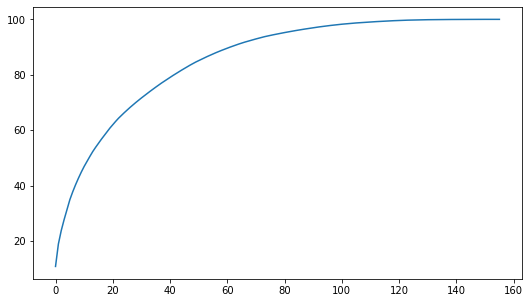

In [33]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## Apllying Logistic regression with PCA by balancing class weights

In [34]:


PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.7875709448180475

### Performance on training and test

In [35]:

predi=pipeline.predict(X_train)

print(confusion_matrix(y_train,predi))
print(classification_report(y_train,predi))

[[14603  4042]
 [  412  1910]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     18645
           1       0.32      0.82      0.46      2322

    accuracy                           0.79     20967
   macro avg       0.65      0.80      0.66     20967
weighted avg       0.90      0.79      0.82     20967



In [36]:
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6263 1790]
 [ 154  779]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8053
           1       0.30      0.83      0.44       933

    accuracy                           0.78      8986
   macro avg       0.64      0.81      0.66      8986
weighted avg       0.91      0.78      0.82      8986



### Hyperparameter tuning - PCA and Logistic Regression

In [37]:
# PCA
pca = PCA()


logistic = LogisticRegression(class_weight='balanced')


steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]


pca_logistic = Pipeline(steps)


params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}


folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 80)


model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [38]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=80, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [39]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8689214859671957
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [40]:
predi=pipeline.predict(X_train)

print(confusion_matrix(y_train,predi))
print(classification_report(y_train,predi))

[[14603  4042]
 [  412  1910]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     18645
           1       0.32      0.82      0.46      2322

    accuracy                           0.79     20967
   macro avg       0.65      0.80      0.66     20967
weighted avg       0.90      0.79      0.82     20967



In [41]:
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6263 1790]
 [ 154  779]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8053
           1       0.30      0.83      0.44       933

    accuracy                           0.78      8986
   macro avg       0.64      0.81      0.66      8986
weighted avg       0.91      0.78      0.82      8986



### Applying Random Forest

In [42]:
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [43]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [44]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7900  153]
 [ 517  416]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8053
           1       0.73      0.45      0.55       933

    accuracy                           0.93      8986
   macro avg       0.83      0.71      0.76      8986
weighted avg       0.92      0.93      0.92      8986



In [45]:

max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

rf2 = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [46]:
# fit model
rf2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.1s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [47]:
importances = rf2.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.046730,total_og_mou_8
1,0.046308,total_ic_mou_8
2,0.039865,total_rech_amt_8
3,0.038557,loc_og_mou_8
4,0.033869,arpu_8
...,...,...
151,0.000672,monthly_3g_7
152,0.000665,sachet_3g_6
153,0.000620,monthly_3g_6
154,0.000110,og_others_8


### Applying XGBclassifier

In [48]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator =xgb.XGBClassifier(scale_pos_weight=9)
parameters = {
    'max_depth': range (2, 10, 4),
    'n_estimators': range(10, 220, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    cv = 4,
    verbose=True
)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done  72 out of  72 | elapsed: 20.1min finished


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=9, subsample=None,
                                     tree_method=None,
  

In [49]:

model_xb1 = xgb.XGBClassifier(scale_pos_weight=9)
model_xb1.fit(X_train, y_train)
# feature importance
print(model_xb1.feature_importances_)


[0.00302438 0.00403992 0.00595389 0.00383594 0.00329198 0.00346708
 0.00556428 0.0031874  0.00397681 0.00935377 0.00594121 0.00283244
 0.0056859  0.00242854 0.00934797 0.04624428 0.00290845 0.00454663
 0.00479069 0.00445411 0.00212731 0.01002367 0.00448998 0.00717054
 0.0103315  0.00267688 0.00287424 0.004275   0.00261011 0.00362489
 0.00969512 0.00356149 0.00355111 0.00287679 0.00307567 0.00353842
 0.00443144 0.0068267  0.01083982 0.00503266 0.00460745 0.02475734
 0.00446562 0.00383134 0.00588628 0.00649326 0.00193775 0.00463119
 0.00340357 0.00308449 0.         0.00218699 0.00686205 0.00336264
 0.04661388 0.00287842 0.00361177 0.00522012 0.00305241 0.00353791
 0.00590591 0.00292888 0.00442    0.0076493  0.00234403 0.00419262
 0.00588283 0.00279977 0.00335114 0.0027062  0.00353026 0.00270096
 0.00368647 0.0036669  0.00362187 0.00445995 0.0044802  0.00436788
 0.0041251  0.0056383  0.00461462 0.12509309 0.00395451 0.00178815
 0.01703927 0.00336156 0.00139566 0.00468962 0.00294357 0.0043

In [50]:
predictions_train = model_xb1.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = model_xb1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18645
           1       0.91      1.00      0.95      2322

    accuracy                           0.99     20967
   macro avg       0.96      0.99      0.97     20967
weighted avg       0.99      0.99      0.99     20967

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8053
           1       0.60      0.68      0.63       933

    accuracy                           0.92      8986
   macro avg       0.78      0.81      0.79      8986
weighted avg       0.92      0.92      0.92      8986



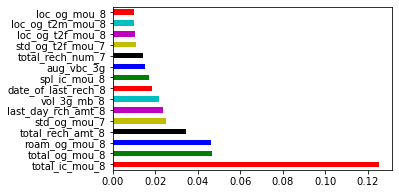

In [51]:
my_colors = list('rgbkymc')
feat_importances = pd.Series(model_xb1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh',color=my_colors)

### Insights for Business
 - Above features plays an important role:
    - Outgoing calls in month 8 Minutes of usage - voice calls
    - Operator mobile to other mobile calls usage and incoming calls usage.
    - Calls minutes of usage for roaming also plays an important plays. So  roaming service and charges should be considered 
      to decrease the churn.
    - Total recharge amount is also an important indicator along with 3g data usage in 8th month.
    - Volume based cost-when no specific scheme is not purchased and paid as per usage is also needs to be considered 